This notebook explores which genera contribute to the total butyrate producers in the donors (Eric assumes it's just F. prau and I want to confirm or unconfirm that)

In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For now, I'll copy a lot of the code from `calculate_butyrate_producer_abundance.py`, and might eventually put this code into that script (if I decide these figures are worth including in the supplement).

In [152]:

# Copied from original script
def get_genera():
    """
    Returns the list of genera we are considering butyrate producers.

    The taxa from the "[Colonic Butyrate-Producing Communities in Humans: an Overview Using Omics Data](https://msystems.asm.org/content/2/6/e00130-17)" paper are:

    - Odoribacter - yes
        - Table S2: 5/5 genomes have Acetyl-CoA
    - E. ventriosum - not included
        - this is part of Lachnospiraceae_incertae_sedis
        - 1/1 genomes have Acetyl-CoA
    - E. hallii - not included
        - 3/3 E. hallii genomes have Acetyl-CoA
        - this is one of the Lachno incertae sedis species
    - E. rectale - not included
        - 7/7 genomes have Acetyl-CoA
        - this is one of the Lachno incertae sedis species
    - B. crossotus - not included
        - this one is not present in >70% of people, it was just added to Fig 1 bc it's high abundance in a few people
    - S. variabile - yes
        - this was the only subdoligranulum genome (and does have Acetyl-CoA)
    - ClostridiumXIVa - considered (but wasn't in my data, strangely)
        - 42% of the 75 genomes have Acetyl-CoA
        - Paper doesn't address this low percentage, and in fact includes Clostridium XIVa as part of the "global core community"
    - Coprococcus - yes
        - 92% of the 13 genomes have Acetyl-CoA
    - Butyricicoccus - yes
        - 3/3 genomes have Acetyl-CoA
    - Pseudoflavonifractor - yes
        - 66% of 3 genomes have Acetyl-Coa
    - Flavonifractor - yes
        - 10/10 genomes have Acetyl-CoA
    - Anaerostipes  - yes
        - 14/14 genomes have Acetyl-CoA
    - R. intestinalis, R. inulinivorans, and R. faecis - yes, Roseburia
        - 12/12 Roseburia genomes have Acetyl-CoA
        - "Manual inspections of major, abundant  genera led us to resolve Roseburia and Lachnospiraceae incertae sedis at the species level, as sequences  of individual species displayed high phylogenetic distances for all pathway genes"
    - Oscillibacter - yes
        - 83% of 6 genomes have Acetyl-CoA
    - F. prausnitzii - yes
        - 7/7 Faecalibacterium genomes have Acetyl-CoA
        - "For genera that encompassed only one species, such as F. prausnitzii and S. variabile, the species name is displayed."

    We'll use the easy/cleanest ones (genus-level):

    Odoribacter
    ClostridiumXIVa
    Coprococcus
    Butyricicoccus
    Pseudoflavonifractor
    Flavonifractor
    Anaerostipes
    Roseburia
    Oscillibacter
    Faecalibacterium
    Subdoligranulum
    
    7/22 update: let's also add Eubacterium, per reviewer's request

    """
    genera = ['Odoribacter',
              'Clostridium_XIVa',
              'Coprococcus',
              'Butyricicoccus',
              'Pseudoflavonifractor',
              'Flavonifractor',
              'Anaerostipes',
              'Roseburia',
              'Oscillibacter',
              'Faecalibacterium',
              'Subdoligranulum'
             ]
    return genera

# Copied from original script, unchanged
def get_butyrate_genera(tidydf):
    """
    Get the OTU IDs for butyrate-producing genera in a given dataset.

    Note that the list of genera is not an input, it is acquired from
    the function get_genera().

    Parameters
    ----------
    tidydf : pandas DataFrame
        tidy OTU table, with column labeled 'otu_id_gg' that has the
        GreenGenes OTU ID

    Returns
    -------
    but_gg : list
        list of OTU IDs which contain a butyrate-producing genus
    """
    genera = get_genera()
    alltaxa_gg = tidydf['otu_id_gg'].unique().tolist()

    but_gg = []
    for g in genera:
        but_gg += [i for i in alltaxa_gg if g in i]
    but_gg = list(set(but_gg))

    return but_gg

In [153]:
fmeta_jacob = '../../data/clean/jacob2017.metadata.txt'
ftidy_jacob = '../../data/clean/jacob2017.tidy_otu_w_taxonomy.txt'

fmeta_goyal = '../../data/clean/goyal2018.metadata.txt'
ftidy_goyal = '../../data/clean/goyal2018.tidy_otu_w_taxonomy.txt'

fmeta_kump = '../../data/raw/kump2018/mapping_file.txt'
ftidy_kump = '../../data/clean/kump2018.tidy_otu_w_taxonomy.txt'

tidyjacob = pd.read_csv(ftidy_jacob, sep='\t')
metajacob = pd.read_csv(fmeta_jacob, sep='\t', index_col=0)

tidygoyal = pd.read_csv(ftidy_goyal, sep='\t')
metagoyal = pd.read_csv(fmeta_goyal, sep='\t', index_col=0)

tidykump = pd.read_csv(ftidy_kump, sep='\t')
metakump = pd.read_csv(fmeta_kump, sep='\t', index_col=0)

# Combine tidy OTU tables with metadata
tidyjacob = pd.merge(tidyjacob, metajacob, left_on='sample_id', right_index=True)
tidygoyal = pd.merge(tidygoyal, metagoyal, left_on='sample_id', right_on='sample_alias')
tidykump = pd.merge(tidykump, metakump, left_on='sample_id', right_index=True)

# Relative abundance
tidyjacob['rel_abun'] = tidyjacob['reads'] / tidyjacob['total_reads']
tidygoyal['rel_abun'] = tidygoyal['reads'] / tidygoyal['total_reads']
tidykump['rel_abun'] = tidykump['reads'] / tidykump['total_reads']

In [154]:
tidyjacob.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,...,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient,rel_abun
0,SRR5629110,37776.0,355281665bb16bf1045de9cf09b44711,13149.0,355281665bb16bf1045de9cf09b44711,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.927902,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,355281665bb16bf1045de9cf09b44711,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.348078
78,SRR5629110,37776.0,fb9fff85b91dae8de2154b82cd2ca4b5,5156.0,fb9fff85b91dae8de2154b82cd2ca4b5,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.866420,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,fb9fff85b91dae8de2154b82cd2ca4b5,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.136489
156,SRR5629110,37776.0,18f4f0fa87b2d71da0960a0a97789d8a,2394.0,18f4f0fa87b2d71da0960a0a97789d8a,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.813441,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,18f4f0fa87b2d71da0960a0a97789d8a,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.063374
234,SRR5629110,37776.0,6b0b8441595e1addeb4f99104145712d,2212.0,6b0b8441595e1addeb4f99104145712d,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.979358,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,6b0b8441595e1addeb4f99104145712d,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.058556
312,SRR5629110,37776.0,7fba824db92f5ec74a3eec738f374f71,1281.0,7fba824db92f5ec74a3eec738f374f71,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.928561,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,7fba824db92f5ec74a3eec738f374f71,D_0__Bacteria;D_1__Bacteroidetes;D_2__Bacteroi...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.033910


In [155]:
genera = get_genera()
genera

['Odoribacter',
 'Clostridium_XIVa',
 'Coprococcus',
 'Butyricicoccus',
 'Pseudoflavonifractor',
 'Flavonifractor',
 'Anaerostipes',
 'Roseburia',
 'Oscillibacter',
 'Faecalibacterium',
 'Subdoligranulum']

## Reviewer response: try to find Eubacterium rectale, hallii, and ventriosum

In [156]:
# Just look at the taxa
tidyjacob_taxa = tidyjacob['otu_id_gg'].str.split(';', expand=True)
tidyjacob_taxa.columns = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'asv']

tidygoyal_taxa = tidygoyal['otu_id_gg'].str.split(';', expand=True)
tidygoyal_taxa.columns = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'asv']

tidykump_taxa = tidykump['otu_id_gg'].str.split(';', expand=True)
tidykump_taxa.columns = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'asv']

In [157]:
eubact_species = ['s__hallii', 's__rectale', 's__ventriosum']

print(tidyjacob_taxa.query('species == @eubact_species'))
print(tidygoyal_taxa.query('species == @eubact_species'))
print(tidykump_taxa.query('species == @eubact_species'))

Empty DataFrame
Columns: [kingdom, phylum, class, order, family, genus, species, asv]
Index: []
Empty DataFrame
Columns: [kingdom, phylum, class, order, family, genus, species, asv]
Index: []
Empty DataFrame
Columns: [kingdom, phylum, class, order, family, genus, species, asv]
Index: []


In [158]:
# Ok, which species are eubacteria?
print(tidyjacob_taxa.query('genus == "g__[Eubacterium]"')[['genus', 'species']].drop_duplicates())
print(tidygoyal_taxa.query('genus == "g__[Eubacterium]"')[['genus', 'species']].drop_duplicates())
print(tidykump_taxa.query('genus == "g__[Eubacterium]"')[['genus', 'species']].drop_duplicates())

                  genus      species
1404   g__[Eubacterium]   s__biforme
6708   g__[Eubacterium]  s__dolichum
49062  g__[Eubacterium]          s__
                 genus      species
160   g__[Eubacterium]  s__dolichum
1088  g__[Eubacterium]   s__biforme
                   genus          species
101824  g__[Eubacterium]      s__dolichum
158068  g__[Eubacterium]              s__
217752  g__[Eubacterium]       s__biforme
227556  g__[Eubacterium]  s__cylindroides


In the Vital paper, these Eubacteria are classified as Lachnospiracea_incertae_sedis. Let's see if we have those here...?

In [159]:
print(tidyjacob_taxa[tidyjacob_taxa['genus'].str.contains('achno')][['genus', 'species']].drop_duplicates())
print(tidygoyal_taxa[tidygoyal_taxa['genus'].str.contains('achno')][['genus', 'species']].drop_duplicates())
print(tidykump_taxa[tidykump_taxa['genus'].str.contains('achno')][['genus', 'species']].drop_duplicates())

                    genus species
1326       g__Lachnospira     s__
18486  g__Lachnobacterium     s__
                  genus species
173      g__Lachnospira     s__
815  g__Lachnobacterium     s__
                         genus   species
23564       g__Lachnobacterium       s__
36120           g__Lachnospira       s__
148436  g__Lachnoanaerobaculum  s__orale


Okay, this is a bummer. Will report back to reviewers, and continue as before.

In [160]:
# Find butyrate producing OTUs

# Nested list comprehension: keep all OTU IDs which have
# any of the genera in them
butprod_jacob = [
    i for g in genera for i in tidyjacob['otu_id_gg'].unique().tolist() if g in i
    ]

butprod_goyal = [
    i for g in genera for i in tidygoyal['otu_id_gg'].unique().tolist() if g in i
    ]

butprod_kump = [
    i for g in genera for i in tidykump['otu_id_gg'].unique().tolist() if g in i
    ]

print(len(butprod_jacob), len(butprod_goyal), len(butprod_kump))

(83, 177, 167)


In [161]:
butjacob = tidyjacob.query('otu_id_gg == @butprod_jacob')
butkump = tidykump.query('otu_id_gg == @butprod_kump')
butgoyal = tidygoyal.query('otu_id_gg == @butprod_goyal')

In [162]:
butjacob.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,...,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient,rel_abun
78,SRR5629110,37776.0,fb9fff85b91dae8de2154b82cd2ca4b5,5156.0,fb9fff85b91dae8de2154b82cd2ca4b5,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.866420,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,fb9fff85b91dae8de2154b82cd2ca4b5,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.136489
468,SRR5629110,37776.0,56b419956017b04c1fd0898b14dcf7a2,1031.0,56b419956017b04c1fd0898b14dcf7a2,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.990759,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,56b419956017b04c1fd0898b14dcf7a2,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.027292
702,SRR5629110,37776.0,7be3fed5631db826c499e1f0f3d5bff1,804.0,7be3fed5631db826c499e1f0f3d5bff1,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.767640,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,7be3fed5631db826c499e1f0f3d5bff1,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.021283
1638,SRR5629110,37776.0,e8afdbb127d2a215680894c17b46ac50,177.0,e8afdbb127d2a215680894c17b46ac50,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.809193,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,e8afdbb127d2a215680894c17b46ac50,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.004686
1950,SRR5629110,37776.0,e96d365cd48141668838c3f8121fa21a,117.0,e96d365cd48141668838c3f8121fa21a,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.998879,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,e96d365cd48141668838c3f8121fa21a,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.003097


In [163]:
print(butjacob.shape, butkump.shape, butgoyal.shape)

((6474, 69), (28724, 23), (19293, 77))


# Kump 2018

In [164]:
butkump.columns

Index([u'sample_id', u'total_reads', u'#OTU ID', u'reads', u'Feature ID_gg',
       u'Taxon_gg', u'Confidence_gg', u'otu_id_gg', u'Feature ID_silva',
       u'Taxon_silva', u'Confidence_silva', u'otu_id_silva', u'Forward_read',
       u'Reverse_read', u'Matter', u'Identity', u'PatientID', u'DonorID',
       u'Response', u'Sampletype', u'prepost', u'Sampling_day', u'rel_abun'],
      dtype='object')

In [165]:
# Kump 2018 - get average across all sampling days
butkump_avg = (
    butkump
        .query('Sampletype == "Donorstool"')
        .groupby(['otu_id_gg', 'DonorID', 'Response', 'PatientID'])
        .mean()
        ['rel_abun']
    ).reset_index()
butkump_avg['Sampling_day'] = 'average'
butkump_avg.head()

,otu_id_gg,DonorID,Response,PatientID,rel_abun,Sampling_day
0,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,DB,NR,PD,0.0,average
1,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,DC,PR,PK,0.0,average
2,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,DC,RE,PE,0.0,average
3,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,DD,PR,PF,0.0,average
4,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...,DE,PR,PG,0.0,average


In [166]:
butkump_avg = butkump_avg.replace(0, np.nan).dropna()

In [167]:
# One of the donors was given to two patients, need to make unique IDs then
butkump_avg['Donor_Patient_IDs'] = butkump_avg['DonorID'] + '_' + butkump_avg['PatientID']

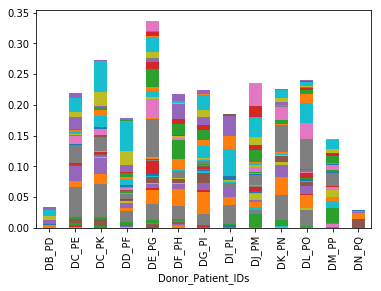

In [168]:
butkump_wide = (
    butkump_avg
        .pivot(index='Donor_Patient_IDs', columns='otu_id_gg', values='rel_abun')
    )
butkump_wide.plot(kind='bar', stacked=True, legend=False)

In [169]:
# How many genera are there? Color OTUs by genus
gcolordict = {i: j for i, j in zip(genera, sns.color_palette('Set3', n_colors=len(genera)))}

colors = []
for o in butkump_wide.columns:
    g = [i for i in genera if i in o]
    if len(g) > 1:
        print(o)
        raise ValueError('Too many genera in this OTU')
    
    colors.append(gcolordict[g[0]])

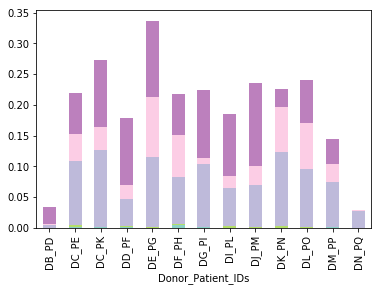

In [170]:
butkump_wide.plot(kind='bar', stacked=True, legend=False, color=colors)

Odoribacter, Clostridium_XIVa, Coprococcus, Butyricicoccus, Pseudoflavonifractor, Flavonifractor, Anaerostipes, Roseburia, Oscillibacter, Faecalibacterium, Subdoligranulum


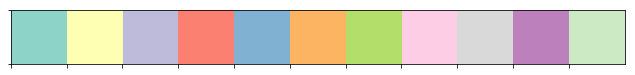

In [171]:
print(', '.join(genera))
sns.palplot(sns.color_palette('Set3', n_colors=len(genera)))

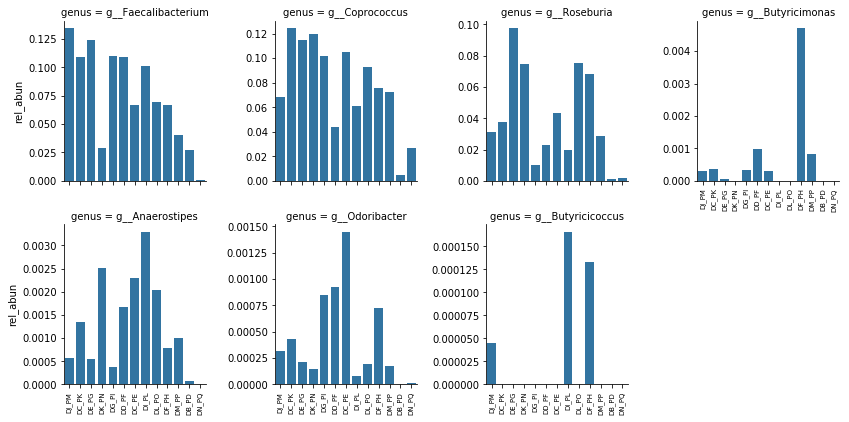

In [191]:
# Plot each genus on a Facet Grid
butkump_avg['genus'] = butkump_avg['otu_id_gg'].str.split(';').str[-3]
butkump_genus = butkump_avg.groupby(['Donor_Patient_IDs', 'genus']).sum().reset_index()

# Sort by rel abun so most abundant genus is plotted first
butkump_genus = butkump_genus.sort_values(by='rel_abun', ascending=False)

# Get donors for x-axis
kump_donors = butkump_genus['Donor_Patient_IDs'].unique()

g = sns.FacetGrid(data=butkump_genus, col='genus', 
                  col_wrap=4, sharey=False)
g.map(sns.barplot, 'Donor_Patient_IDs', 'rel_abun', order=kump_donors)
g.set_xticklabels(rotation=90, fontsize='x-small')
g.set_xlabels('')

plt.savefig('../../figures/final/suppfig.butyrate_producer_genera.kump.png', bbox_inches='tight')

So most samples are made up of Coprococcus (light blue), Faecalibacterium (purple), and Roseburia (pink). Some have a little bit of other things, but only very very small amount.

Let's keep going with the other studies before deciding whether it's worth including in the supplement... 

# Jacob 2017

In [173]:
butjacob.columns

Index([u'sample_id', u'total_reads', u'#OTU ID', u'reads', u'Feature ID_gg',
       u'Taxon_gg', u'Confidence_gg', u'otu_id_gg', u'Feature ID_silva',
       u'Taxon_silva', u'Confidence_silva', u'otu_id_silva', u'patient_id',
       u'sample_type', u'donor_patient', u'remission_w4', u'response_w4',
       u'sample_title', u'study_accession', u'secondary_study_accession',
       u'sample_accession', u'secondary_sample_accession',
       u'experiment_accession', u'submission_accession', u'tax_id',
       u'scientific_name', u'instrument_platform', u'instrument_model',
       u'library_name', u'nominal_length', u'library_layout',
       u'library_strategy', u'library_source', u'library_selection',
       u'read_count', u'base_count', u'center_name', u'first_public',
       u'last_updated', u'experiment_title', u'study_title', u'study_alias',
       u'experiment_alias', u'run_alias', u'fastq_bytes', u'fastq_md5',
       u'fastq_ftp', u'fastq_aspera', u'fastq_galaxy', u'submitted_bytes',
  

In [174]:
butjacob.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,...,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient,rel_abun
78,SRR5629110,37776.0,fb9fff85b91dae8de2154b82cd2ca4b5,5156.0,fb9fff85b91dae8de2154b82cd2ca4b5,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.866420,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,fb9fff85b91dae8de2154b82cd2ca4b5,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.136489
468,SRR5629110,37776.0,56b419956017b04c1fd0898b14dcf7a2,1031.0,56b419956017b04c1fd0898b14dcf7a2,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.990759,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,56b419956017b04c1fd0898b14dcf7a2,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.027292
702,SRR5629110,37776.0,7be3fed5631db826c499e1f0f3d5bff1,804.0,7be3fed5631db826c499e1f0f3d5bff1,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.767640,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,7be3fed5631db826c499e1f0f3d5bff1,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.021283
1638,SRR5629110,37776.0,e8afdbb127d2a215680894c17b46ac50,177.0,e8afdbb127d2a215680894c17b46ac50,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.809193,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,e8afdbb127d2a215680894c17b46ac50,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.004686
1950,SRR5629110,37776.0,e96d365cd48141668838c3f8121fa21a,117.0,e96d365cd48141668838c3f8121fa21a,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.998879,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,e96d365cd48141668838c3f8121fa21a,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/000/SRR5629110,NaN,NaN,NaN,Longman.FMT.002.W2.Pool253.Integrated,NaN,NaN,2017-11-09,2,0.003097


In [175]:
(butjacob
     .query('donor_patient == "donor"')
     .groupby(['sample_id', 'sample_type',
               'donor_patient', 'remission_w4',
               'response_w4', 'patient_id'])
     .size()
)

sample_id   sample_type  donor_patient  remission_w4  response_w4  patient_id
SRR5629088  donor        donor          No            No           1             83
SRR5629090  donor        donor          No            No           2             83
SRR5629098  donor        donor          No            No           3             83
SRR5629104  donor        donor          No            Yes          24            83
SRR5629107  donor        donor          No            Yes          4             83
SRR5629113  donor        donor          No            No           11            83
SRR5629115  donor        donor          No            No           10            83
SRR5629116  donor        donor          No            No           6             83
SRR5629120  donor        donor          No            Yes          33            83
SRR5629122  donor        donor          No            No           21            83
SRR5629137  donor        donor          Yes           Yes          12            8

Okay good, so querying donor_patient == "donor" gets me the samples I need.

In [176]:
butjacob = butjacob.query('donor_patient == "donor"')

In [177]:
butjacob_wide = butjacob.pivot(index='sample_id', columns='otu_id_gg', values='rel_abun')

In [178]:
colors = []
for o in butjacob_wide.columns:
    g = [i for i in genera if i in o]
    if len(g) > 1:
        print(o)
        raise ValueError('Too many genera in this OTU')
    
    colors.append(gcolordict[g[0]])

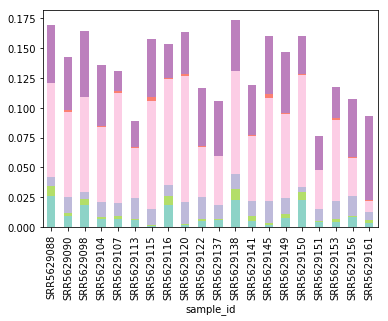

In [179]:
butjacob_wide.plot(kind='bar', stacked=True, legend=False, color=colors)

Okay, still dominated by Roseburia (pink) and F prau (purple), have much less of the Coprococcus (light blue), but now also have more other stuff: Odoribacter (teal), Butyricicoccus(red), and Anaerostipes (green)

In [180]:
butjacob.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,...,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,nominal_sdev,first_created,Patient,rel_abun
80,SRR5629141,18039.0,fb9fff85b91dae8de2154b82cd2ca4b5,230.0,fb9fff85b91dae8de2154b82cd2ca4b5,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.866420,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,fb9fff85b91dae8de2154b82cd2ca4b5,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/001/SRR5629141,NaN,NaN,NaN,Longman.FMT.025.Donor.Project8,NaN,NaN,2017-11-09,25,0.012750
470,SRR5629141,18039.0,56b419956017b04c1fd0898b14dcf7a2,111.0,56b419956017b04c1fd0898b14dcf7a2,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.990759,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,56b419956017b04c1fd0898b14dcf7a2,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/001/SRR5629141,NaN,NaN,NaN,Longman.FMT.025.Donor.Project8,NaN,NaN,2017-11-09,25,0.006153
704,SRR5629141,18039.0,7be3fed5631db826c499e1f0f3d5bff1,888.0,7be3fed5631db826c499e1f0f3d5bff1,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.767640,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,7be3fed5631db826c499e1f0f3d5bff1,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/001/SRR5629141,NaN,NaN,NaN,Longman.FMT.025.Donor.Project8,NaN,NaN,2017-11-09,25,0.049227
1640,SRR5629141,18039.0,e8afdbb127d2a215680894c17b46ac50,0.0,e8afdbb127d2a215680894c17b46ac50,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.809193,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,e8afdbb127d2a215680894c17b46ac50,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/001/SRR5629141,NaN,NaN,NaN,Longman.FMT.025.Donor.Project8,NaN,NaN,2017-11-09,25,0.000000
1952,SRR5629141,18039.0,e96d365cd48141668838c3f8121fa21a,4.0,e96d365cd48141668838c3f8121fa21a,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.998879,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,e96d365cd48141668838c3f8121fa21a,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,ftp.sra.ebi.ac.uk/vol1/srr/SRR562/001/SRR5629141,NaN,NaN,NaN,Longman.FMT.025.Donor.Project8,NaN,NaN,2017-11-09,25,0.000222


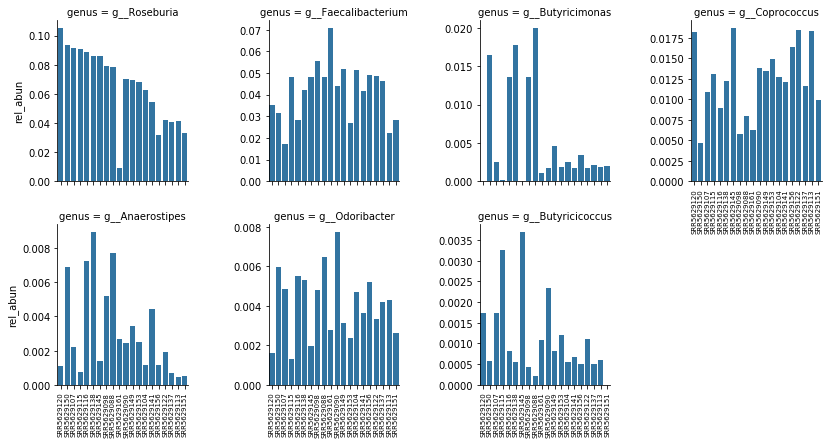

In [190]:
# Plot each genus on a Facet Grid
butjacob['genus'] = butjacob['otu_id_gg'].str.split(';').str[-3]
butjacob_genus = butjacob.groupby(['sample_id', 'genus']).sum().reset_index()

# Sort by rel abun so most abundant genus is plotted first
butjacob_genus = butjacob_genus.sort_values(by='rel_abun', ascending=False)

# Get donors for x-axis
jacob_donors = butjacob_genus['sample_id'].unique()

g = sns.FacetGrid(data=butjacob_genus, col='genus', 
                  col_wrap=4, sharey=False)
g.map(sns.barplot, 'sample_id', 'rel_abun', order=jacob_donors)
g.set_xticklabels(rotation=90, fontsize='x-small')
g.set_xlabels('')

plt.savefig('../../figures/final/suppfig.butyrate_producer_genera.jacob.png', bbox_inches='tight')

# Goyal 2018

In [182]:
butgoyal.columns

Index([u'sample_id', u'total_reads', u'#OTU ID', u'reads', u'Feature ID_gg',
       u'Taxon_gg', u'Confidence_gg', u'otu_id_gg', u'Feature ID_silva',
       u'Taxon_silva', u'Confidence_silva', u'otu_id_silva',
       u'secondary_study_accession', u'sample_accession',
       u'secondary_sample_accession', u'experiment_accession',
       u'run_accession', u'submission_accession', u'tax_id',
       u'scientific_name', u'instrument_platform', u'instrument_model',
       u'library_name', u'library_layout', u'nominal_length',
       u'library_strategy', u'library_source', u'library_selection',
       u'read_count', u'base_count', u'center_name', u'first_public',
       u'last_updated', u'experiment_title', u'study_title', u'study_alias',
       u'experiment_alias', u'run_alias', u'fastq_bytes', u'fastq_md5',
       u'fastq_ftp', u'fastq_aspera', u'fastq_galaxy', u'submitted_bytes',
       u'submitted_md5', u'submitted_ftp', u'submitted_aspera',
       u'submitted_galaxy', u'submitted_format

In [183]:
butgoyal.head()

,sample_id,total_reads,#OTU ID,reads,Feature ID_gg,Taxon_gg,Confidence_gg,otu_id_gg,Feature ID_silva,Taxon_silva,...,Screen,Week 1,Month 1,Month 6,Notes,remission_m1,response_m1,remission_m6,response_m6,rel_abun
0,FMT.03.042.W,38400.0,90139774f761b15ef73f969b9efd29c7,2194.0,90139774f761b15ef73f969b9efd29c7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.901875,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,90139774f761b15ef73f969b9efd29c7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,10.0,0.0,0.0,NaN,NaN,True,True,False,False,0.057135
1,FMT.03.042.W,38400.0,c3cd39227e9ebd70fee95899f7485e4e,1734.0,c3cd39227e9ebd70fee95899f7485e4e,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.935518,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,c3cd39227e9ebd70fee95899f7485e4e,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,10.0,0.0,0.0,NaN,NaN,True,True,False,False,0.045156
15,FMT.03.042.W,38400.0,ea4331ab279c6c7756167cd33e119ed7,627.0,ea4331ab279c6c7756167cd33e119ed7,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.900978,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,ea4331ab279c6c7756167cd33e119ed7,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,10.0,0.0,0.0,NaN,NaN,True,True,False,False,0.016328
19,FMT.03.042.W,38400.0,c87a7d6aea8193e4c360c6126e703fb0,480.0,c87a7d6aea8193e4c360c6126e703fb0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.942527,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,c87a7d6aea8193e4c360c6126e703fb0,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,10.0,0.0,0.0,NaN,NaN,True,True,False,False,0.012500
25,FMT.03.042.W,38400.0,ca8a3b52b3e371c65234f57b1e72702a,424.0,ca8a3b52b3e371c65234f57b1e72702a,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.933102,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...,ca8a3b52b3e371c65234f57b1e72702a,D_0__Bacteria;D_1__Firmicutes;D_2__Clostridia;...,...,10.0,0.0,0.0,NaN,NaN,True,True,False,False,0.011042


In [184]:
butgoyal.query('time_point == "donor"').groupby(['sample_id', 'patient_id',
                  'sample_type', 'time_point',
                  'remission_m1', 'response_m1',
                  'remission_m6', 'response_m6']).size()

sample_id      patient_id  sample_type  time_point  remission_m1  response_m1  remission_m6  response_m6
FMT.01.004.D   4           D            donor       False         False        False         False          177
FMT.01.005.D   5           D            donor       False         True         False         True           177
FMT.01.007.D   7           D            donor       False         True         False         False          177
FMT.01.010.D   10          D            donor       True          True         False         False          177
FMT.01.011.D   11          D            donor       True          True         True          True           177
FMT.01.016.D   16          D            donor       False         True         False         True           177
FMT.01.022.D   22          D            donor       False         True         False         True           177
FMT.01.023.D   23          D            donor       False         True         False         True           177

Here as well, I can just query time_point == donor and get just one sample per row. Good.

In [185]:
butgoyal = butgoyal.query('time_point == "donor"')
butgoyal_wide = butgoyal.pivot(index='sample_id', columns='otu_id_gg', values='rel_abun')

In [186]:
colors = []
for o in butgoyal_wide.columns:
    g = [i for i in genera if i in o]
    if len(g) > 1:
        print(o)
        raise ValueError('Too many genera in this OTU')
    
    colors.append(gcolordict[g[0]])

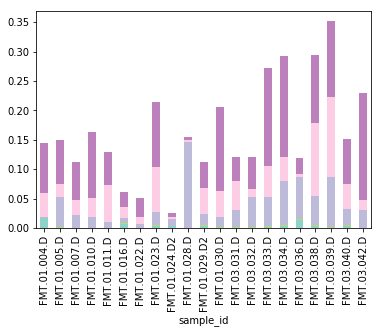

In [187]:
butgoyal_wide.plot(kind='bar', stacked=True, legend=False, color=colors)

This one looks much more like Kump: dominated by F prau (purple), Roseburia (pink), and Coprococcus (blue). Some Odoribacter (teal?) as well.

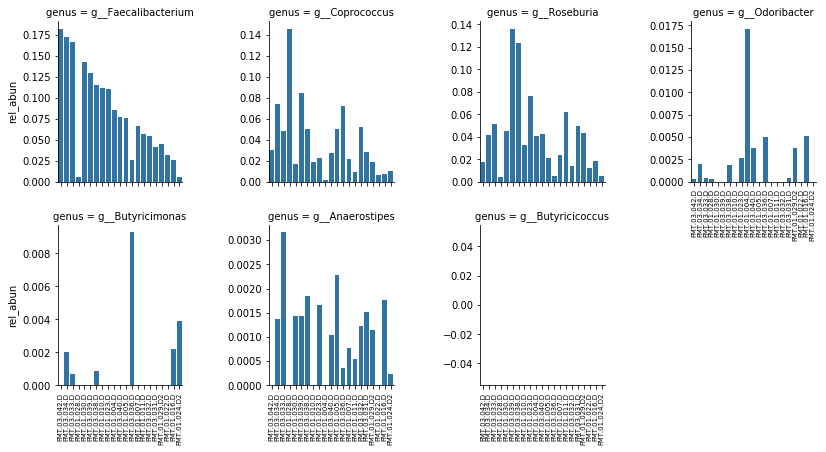

In [189]:
# Plot each genus on a Facet Grid
butgoyal['genus'] = butgoyal['otu_id_gg'].str.split(';').str[-3]
butgoyal_genus = butgoyal.groupby(['sample_id', 'genus']).sum().reset_index()

# Sort by rel abun so most abundant genus is plotted first
butgoyal_genus = butgoyal_genus.sort_values(by='rel_abun', ascending=False)

# Get donors for x-axis
goyal_donors = butgoyal_genus['sample_id'].unique()

g = sns.FacetGrid(data=butgoyal_genus, col='genus', 
                  col_wrap=4, sharey=False)
g.map(sns.barplot, 'sample_id', 'rel_abun', order=goyal_donors)
g.set_xticklabels(rotation=90, fontsize='x-small')
g.set_xlabels('')

plt.savefig('../../figures/final/suppfig.butyrate_producer_genera.goyal.png', bbox_inches='tight')

# tl'dr

I kinda like this, but also don't feel super strongly about it. Future iterations could give each OTU a different shade, but before doing that work I'll ask Eric what he thinks about showing this vs. just the gray bars.